In [ ]:
pip install tensorflow-datasets


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (adjust path if needed)
df = pd.read_csv("/kaggle/input/qm9-subset-csv/qm9_subset.csv")

# Features = everything except 'gap', Target = 'gap'
X = df[['homo', 'lumo', 'mu', 'alpha']]
y = df['gap']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Linear Regression ---
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lr = linreg.predict(X_test)

print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

# --- Random Forest ---
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


Linear Regression:
MSE: 4.3358753579341384e-30
R²: 1.0

Random Forest:
MSE: 0.025334920593507126
R²: 0.9876944877840698


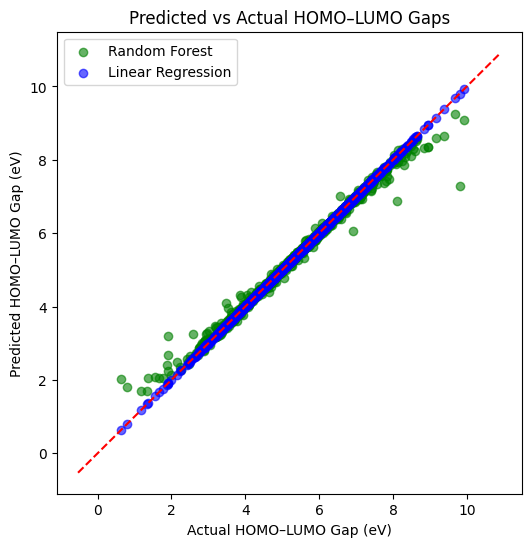

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))

# Scatter plot for Random Forest predictions
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Random Forest", color="green")

# Scatter plot for Linear Regression predictions
plt.scatter(y_test, y_pred_lr, alpha=0.6, label="Linear Regression", color="blue")

# Ideal line
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")

plt.xlabel("Actual HOMO–LUMO Gap (eV)")
plt.ylabel("Predicted HOMO–LUMO Gap (eV)")
plt.title("Predicted vs Actual HOMO–LUMO Gaps")
plt.legend()
plt.show()


LASSO Regression:
Best alpha: 0.012130635113404887
MSE: 2.0571846982282604
R²: 0.0007976799832434267


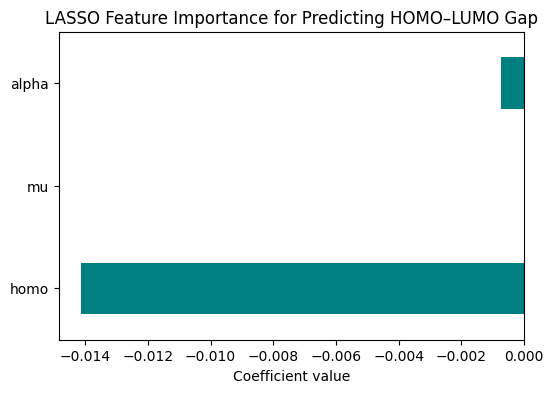

In [7]:
from sklearn.linear_model import LassoCV
import numpy as np
import matplotlib.pyplot as plt

# Features without lumo
X = df[['homo', 'mu', 'alpha']]
y = df['gap']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# LASSO with cross-validation to choose best alpha
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

print("LASSO Regression:")
print("Best alpha:", lasso.alpha_)
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R²:", r2_score(y_test, y_pred_lasso))

# Feature importance (coefficients)
coefs = pd.Series(lasso.coef_, index=X.columns)

plt.figure(figsize=(6,4))
coefs.plot(kind='barh', color="teal")
plt.title("LASSO Feature Importance for Predicting HOMO–LUMO Gap")
plt.xlabel("Coefficient value")
plt.show()
